In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import math

In [2]:
%matplotlib inline

In [3]:
from utils.config import DATAFOLDER, SVM_PARAM, OPTIMIZER
from models.Regressor import getmodel, myCallbacks

In [4]:
file_loc = os.path.join(DATAFOLDER, "main.csv")
df = pd.read_csv(file_loc)

In [5]:
outlier = []
for counter, i in enumerate(df['Wind speed']):
    if i > 10.0:
        outlier.append(counter)
print(outlier)
df = df.drop(outlier,axis=0)

[2314, 2448, 3062]


In [6]:
df.head()

,Rainfall,Max Temperature,Min Temperature,Maximum Humidity,Min Humidity,Wind Direction,CC,EVP,Wind speed,Solar Radiation,date
0,0.0,17.0,6.8,92.0,65.0,125.0,2.0,0.5,1.0,13.475,1/1
1,0.0,18.0,6.8,97.0,64.0,125.0,2.0,0.0,1.2,13.475,1/2
2,0.0,17.5,6.8,98.0,74.0,130.0,2.0,0.0,0.8,13.475,1/3
3,0.0,19.2,10.4,97.0,50.0,360.0,2.0,0.8,1.2,13.475,1/4
4,0.0,20.3,10.4,95.0,58.0,270.0,2.0,1.2,1.2,13.475,1/5


In [7]:
df = df.drop(columns=['date',"CC"]).dropna()

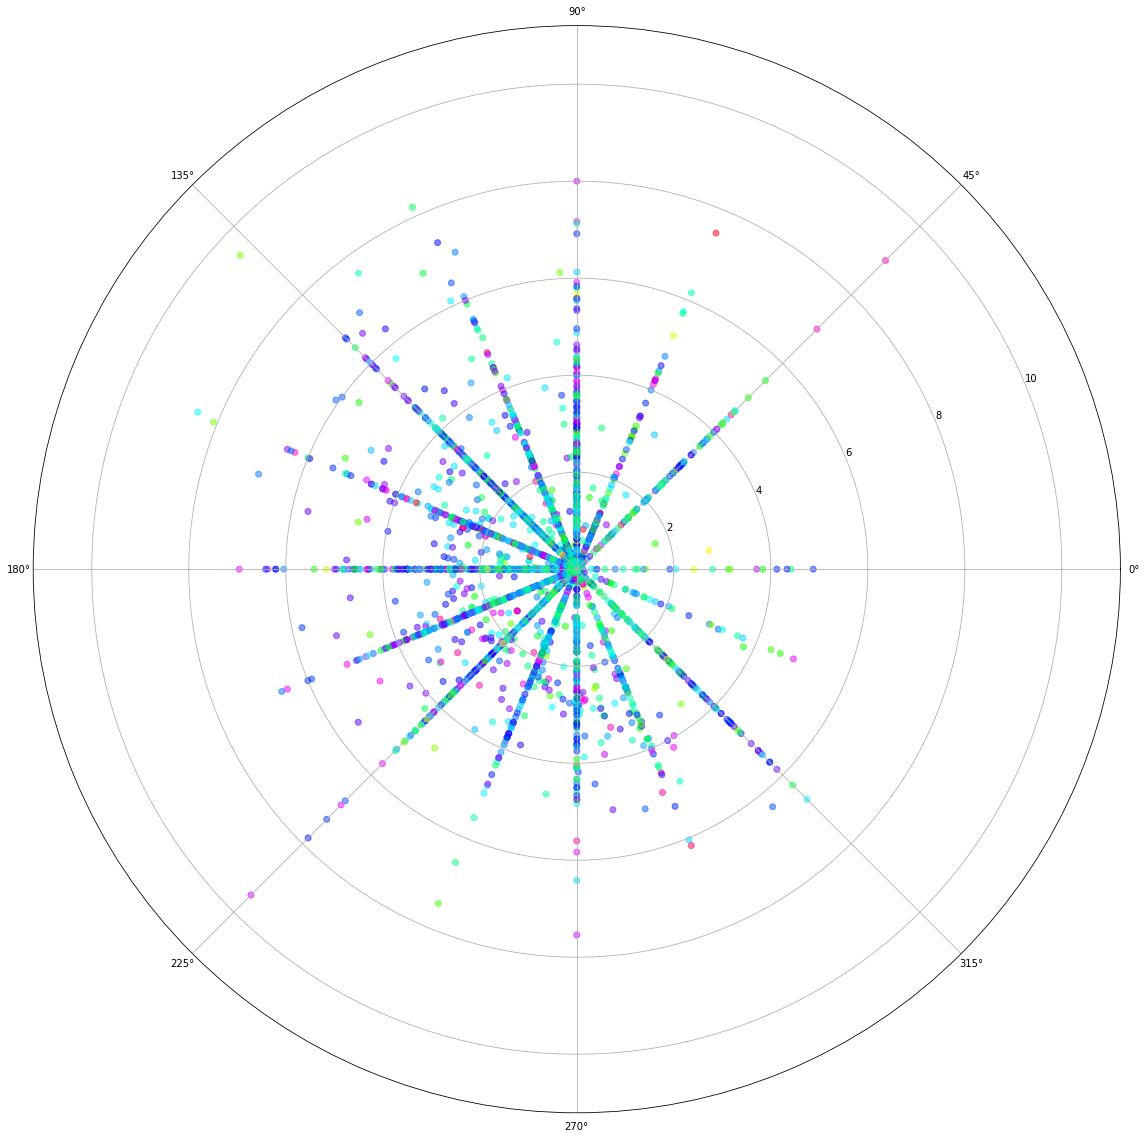

In [8]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter([x*math.pi/180 for x in df["Wind Direction"]], df["Wind speed"], c=df["Solar Radiation"], cmap='hsv', alpha=0.5)

In [9]:
df.corr()

,Rainfall,Max Temperature,Min Temperature,Maximum Humidity,Min Humidity,Wind Direction,EVP,Wind speed,Solar Radiation
Rainfall,1.000000,0.002751,0.133891,0.138639,0.218776,-0.073258,0.001167,0.057769,-0.060207
Max Temperature,0.002751,1.000000,0.820558,-0.324380,-0.271306,-0.080119,0.577631,0.157445,0.662621
Min Temperature,0.133891,0.820558,1.000000,-0.162438,0.029321,-0.178664,0.501490,0.151894,0.435273
Maximum Humidity,0.138639,-0.324380,-0.162438,1.000000,0.415221,-0.034516,-0.315577,-0.041323,-0.427212
Min Humidity,0.218776,-0.271306,0.029321,0.415221,1.000000,-0.153890,-0.191415,-0.256619,-0.365928
Wind Direction,-0.073258,-0.080119,-0.178664,-0.034516,-0.153890,1.000000,-0.072918,0.006598,-0.027590
EVP,0.001167,0.577631,0.501490,-0.315577,-0.191415,-0.072918,1.000000,0.088191,0.480045
Wind speed,0.057769,0.157445,0.151894,-0.041323,-0.256619,0.006598,0.088191,1.000000,0.154366
Solar Radiation,-0.060207,0.662621,0.435273,-0.427212,-0.365928,-0.027590,0.480045,0.154366,1.000000


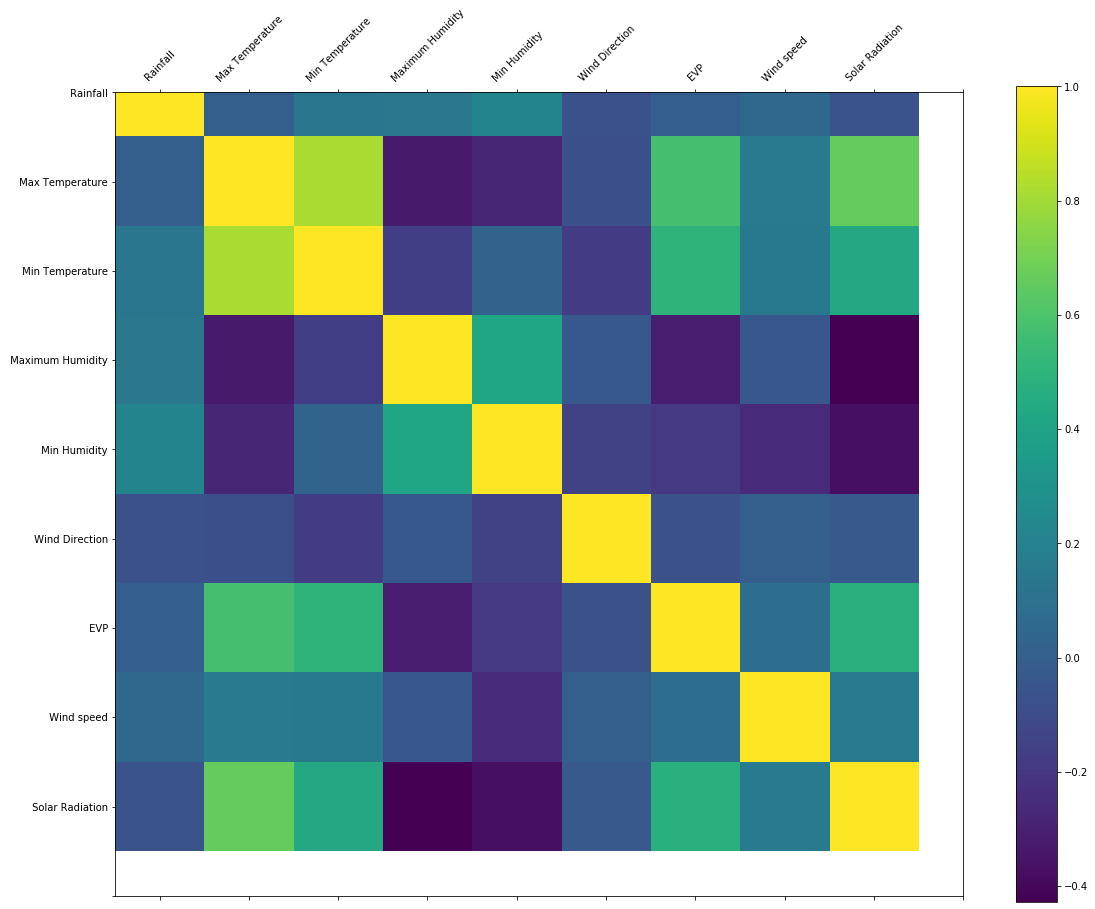

In [10]:
f = plt.figure(figsize=(19, 15))
ax = f.add_subplot(111)
cax = ax.matshow(df.corr(), interpolation='nearest')
f.colorbar(cax)
ax.set_xticks(range(0,10))
ax.set_yticks(range(0,10))
ax.set_xticklabels(" " + df.corr().columns, rotation=45)
ax.set_yticklabels(" " + df.corr().columns)
plt.show()

## Preprocessing of data

In [11]:
Y = df["Wind speed"]
X = df.drop(columns=["Wind speed"])

In [12]:
x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

In [13]:
# y = np.reshape(Y.values, (len(Y.values),1))
# min_max_scaler = MinMaxScaler()
# y_scaled = min_max_scaler.fit_transform(y)
# Y = pd.DataFrame(y_scaled)

In [14]:
X.describe()

,0,1,2,3,4,5,6,7
count,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000
mean,0.009967,0.614833,0.550883,0.165386,0.409928,0.498357,0.227589,0.572726
std,0.045648,0.172182,0.225972,0.059971,0.246171,0.206955,0.107639,0.173097
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.494681,0.369906,0.125000,0.211111,0.358333,0.153846,0.445338
50%,0.000000,0.654255,0.592476,0.184524,0.388889,0.500000,0.203846,0.558824
75%,0.000000,0.736702,0.749216,0.211310,0.577778,0.625000,0.288462,0.682353
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
Y.describe()

count    3041.000000
mean        2.045339
std         1.562091
min         0.000000
25%         0.791667
50%         1.875000
75%         3.000000
max         9.500000
Name: Wind speed, dtype: float64

## Normalised prediction using features

In [16]:
from utils.helper import Plotter
from sklearn.model_selection import train_test_split
plotter = Plotter()

In [17]:
X_val = X[-10:]
Y_val = Y[-10:]



X_train, X_test, Y_train, Y_test = train_test_split(X[0:-10],Y[0:-10], test_size=0.2, random_state = 42)

In [18]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2424, 8)
(2424,)
(607, 8)
(607,)


{'e': 0.5, 's': 0.5, 'c': 100}
-----------------------------------------------------------
MSE: 2.058485814633432 MAE: 1.0701698311538108 R2: 0.13701548960093068
-----------------------------------------------------------


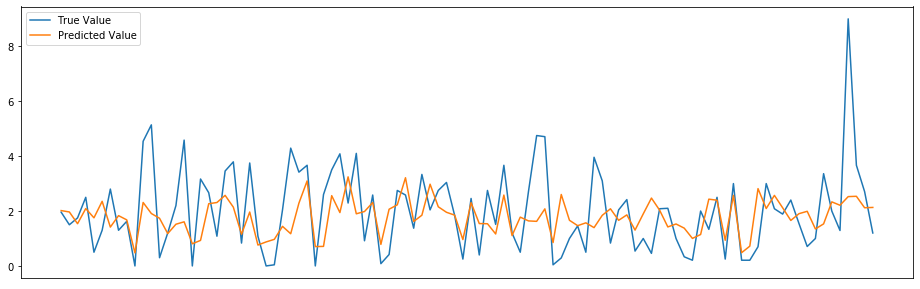

{'e': 1, 's': 1, 'c': 100}
-----------------------------------------------------------
MSE: 2.034929381960028 MAE: 1.0908720195700807 R2: 0.14689111583692027
-----------------------------------------------------------


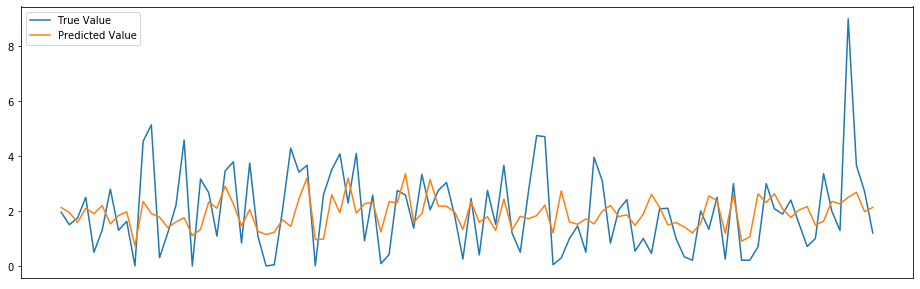

{'e': 0.5, 's': 1, 'c': 500}
-----------------------------------------------------------
MSE: 2.0832504003354955 MAE: 1.0495558096679414 R2: 0.12663336614134457
-----------------------------------------------------------


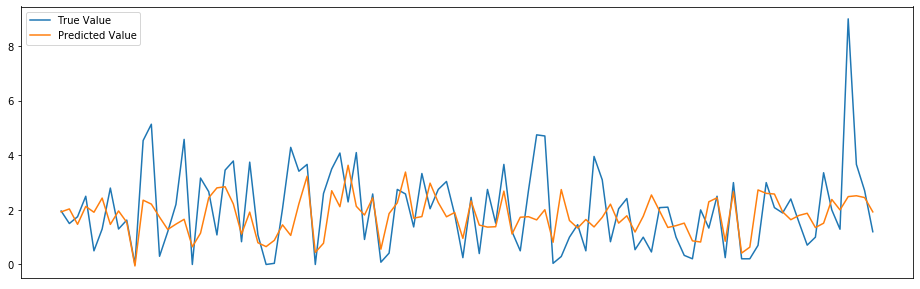

{'e': 0.5, 's': 1, 'c': 1000}
-----------------------------------------------------------
MSE: 2.1393225945166674 MAE: 1.0379892457287632 R2: 0.103126070293859
-----------------------------------------------------------


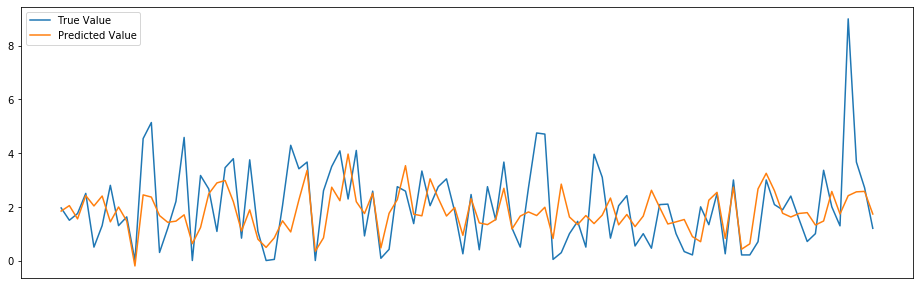

In [19]:
from sklearn import svm
for i in SVM_PARAM:
    print(i)
    svr = svm.SVR(C=i['c'], epsilon=i['e'], gamma="auto", coef0=i['s'])
    svr.fit(X_train, Y_train)
    plotter.find_accurracy_on_testset(svr, X_test, Y_test,clip=True, plot=True)
#     plotter.find_accurracy_on_testset(svr, X_val, Y_val,clip=False, plot= True)

------------------------------------------
RMSprop
------------------------------------------

The mean absolute error for epoch 0 is    1.41 and mean squared error is    3.36.
The mean absolute error for epoch 1 is    1.25 and mean squared error is    2.41.
The mean absolute error for epoch 2 is    1.23 and mean squared error is    2.39.
The mean absolute error for epoch 3 is    1.21 and mean squared error is    2.32.
The mean absolute error for epoch 4 is    1.23 and mean squared error is    2.34.
The mean absolute error for epoch 5 is    1.18 and mean squared error is    2.18.
The mean absolute error for epoch 6 is    1.17 and mean squared error is    2.15.
The mean absolute error for epoch 7 is    1.21 and mean squared error is    2.24.
The mean absolute error for epoch 8 is    1.17 and mean squared error is    2.19.
The mean absolute error for epoch 9 is    1.18 and mean squared error is    2.20.
The mean absolute error for epoch 10 is    1.16 and mean squared error is    2.12.
Th

W0825 21:33:27.153878   844 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 24 is    1.11 and mean squared error is    1.98.
-----------------------------------------------------------
MSE: 2.032796254765282 MAE: 1.1469828972785043 R2: 0.14778539245262012
-----------------------------------------------------------


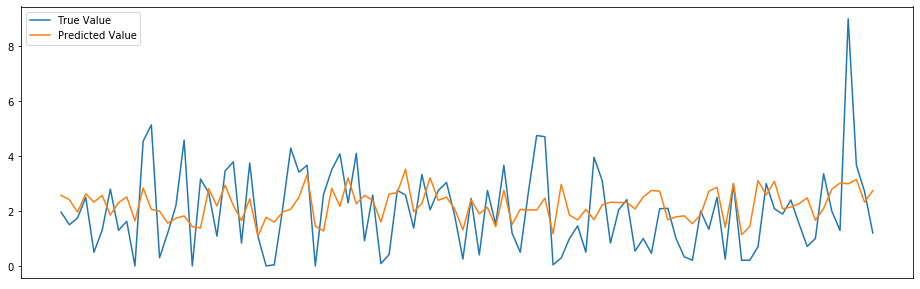






------------------------------------------
SGD
------------------------------------------

The mean absolute error for epoch 0 is    1.38 and mean squared error is    3.27.
The mean absolute error for epoch 1 is    1.23 and mean squared error is    2.36.
The mean absolute error for epoch 2 is    1.28 and mean squared error is    2.54.
The mean absolute error for epoch 3 is    1.25 and mean squared error is    2.39.
The mean absolute error for epoch 4 is    1.23 and mean squared error is    2.33.
The mean absolute error for epoch 5 is    1.25 and mean squared error is    2.43.
The mean absolute error for epoch 6 is    1.24 and mean squared error is    2.35.
The mean absolute error for epoch 7 is    1.23 and mean squared error is    2.36.
The mean absolute error for epoch 8 is    1.23 and mean squared error is    2.37.
The mean absolute error for epoch 9 is    1.22 and mean squared error is    2.25.
The mean absolute error for epoch 10 is    1.19 and mean squared error is    2.28.
T

W0825 21:33:29.538069   844 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 22 is    1.20 and mean squared error is    2.28.
The mean absolute error for epoch 23 is    1.18 and mean squared error is    2.15.
The mean absolute error for epoch 24 is    1.20 and mean squared error is    2.19.
-----------------------------------------------------------
MSE: 2.138915156888085 MAE: 1.1477902290119741 R2: 0.10329688145996996
-----------------------------------------------------------


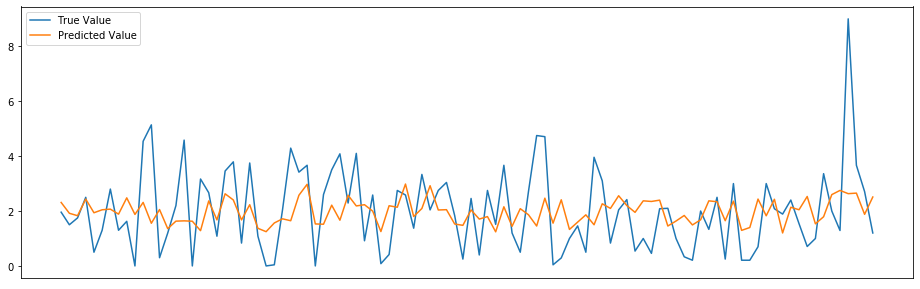






------------------------------------------
Adagrad
------------------------------------------

The mean absolute error for epoch 0 is    1.34 and mean squared error is    2.98.
The mean absolute error for epoch 1 is    1.25 and mean squared error is    2.45.
The mean absolute error for epoch 2 is    1.26 and mean squared error is    2.48.
The mean absolute error for epoch 3 is    1.24 and mean squared error is    2.41.
The mean absolute error for epoch 4 is    1.20 and mean squared error is    2.23.
The mean absolute error for epoch 5 is    1.19 and mean squared error is    2.26.
The mean absolute error for epoch 6 is    1.18 and mean squared error is    2.22.
The mean absolute error for epoch 7 is    1.26 and mean squared error is    2.44.
The mean absolute error for epoch 8 is    1.19 and mean squared error is    2.28.
The mean absolute error for epoch 9 is    1.21 and mean squared error is    2.28.
The mean absolute error for epoch 10 is    1.17 and mean squared error is    2.1

W0825 21:33:32.333682   844 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>



The mean absolute error for epoch 24 is    1.19 and mean squared error is    2.26.
-----------------------------------------------------------
MSE: 2.0900950110581085 MAE: 1.1357494149207195 R2: 0.12376388169246666
-----------------------------------------------------------


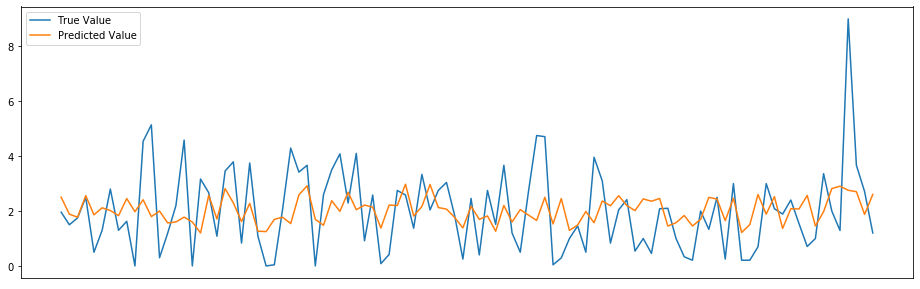






------------------------------------------
Adadelta
------------------------------------------

The mean absolute error for epoch 0 is    1.85 and mean squared error is    5.64.
The mean absolute error for epoch 1 is    1.38 and mean squared error is    3.28.
The mean absolute error for epoch 2 is    1.25 and mean squared error is    2.45.
The mean absolute error for epoch 3 is    1.22 and mean squared error is    2.36.
The mean absolute error for epoch 4 is    1.24 and mean squared error is    2.37.
The mean absolute error for epoch 5 is    1.21 and mean squared error is    2.28.
The mean absolute error for epoch 6 is    1.21 and mean squared error is    2.35.
The mean absolute error for epoch 7 is    1.23 and mean squared error is    2.34.
The mean absolute error for epoch 8 is    1.18 and mean squared error is    2.21.
The mean absolute error for epoch 9 is    1.22 and mean squared error is    2.34.
The mean absolute error for epoch 10 is    1.20 and mean squared error is    2.

W0825 21:33:35.903691   844 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 22 is    1.18 and mean squared error is    2.21.
The mean absolute error for epoch 23 is    1.20 and mean squared error is    2.23.
The mean absolute error for epoch 24 is    1.17 and mean squared error is    2.20.
-----------------------------------------------------------
MSE: 2.05555116737596 MAE: 1.1315721025699095 R2: 0.13824578961498946
-----------------------------------------------------------


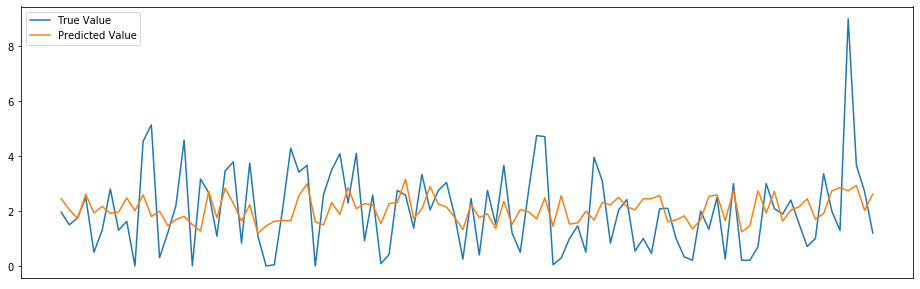






------------------------------------------
Adam
------------------------------------------

The mean absolute error for epoch 0 is    1.65 and mean squared error is    4.68.
The mean absolute error for epoch 1 is    1.30 and mean squared error is    2.59.
The mean absolute error for epoch 2 is    1.21 and mean squared error is    2.29.
The mean absolute error for epoch 3 is    1.22 and mean squared error is    2.27.
The mean absolute error for epoch 4 is    1.23 and mean squared error is    2.38.
The mean absolute error for epoch 5 is    1.19 and mean squared error is    2.19.
The mean absolute error for epoch 6 is    1.20 and mean squared error is    2.27.
The mean absolute error for epoch 7 is    1.21 and mean squared error is    2.22.
The mean absolute error for epoch 8 is    1.20 and mean squared error is    2.26.
The mean absolute error for epoch 9 is    1.19 and mean squared error is    2.23.
The mean absolute error for epoch 10 is    1.16 and mean squared error is    2.05.


W0825 21:33:38.556654   844 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 21 is    1.14 and mean squared error is    2.04.
The mean absolute error for epoch 22 is    1.16 and mean squared error is    2.12.
The mean absolute error for epoch 23 is    1.14 and mean squared error is    2.02.
The mean absolute error for epoch 24 is    1.15 and mean squared error is    2.03.
-----------------------------------------------------------
MSE: 2.020010195762373 MAE: 1.1186355470620337 R2: 0.15314572614553124
-----------------------------------------------------------


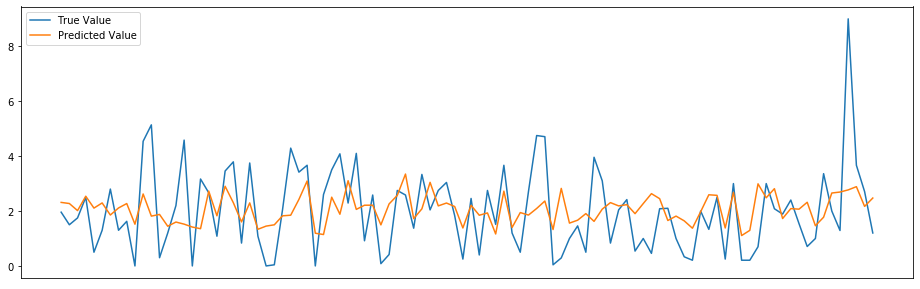






------------------------------------------
Adamax
------------------------------------------

The mean absolute error for epoch 0 is    1.45 and mean squared error is    3.54.
The mean absolute error for epoch 1 is    1.26 and mean squared error is    2.44.
The mean absolute error for epoch 2 is    1.24 and mean squared error is    2.43.
The mean absolute error for epoch 3 is    1.22 and mean squared error is    2.31.
The mean absolute error for epoch 4 is    1.22 and mean squared error is    2.28.
The mean absolute error for epoch 5 is    1.20 and mean squared error is    2.29.
The mean absolute error for epoch 6 is    1.18 and mean squared error is    2.22.
The mean absolute error for epoch 7 is    1.17 and mean squared error is    2.16.
The mean absolute error for epoch 8 is    1.20 and mean squared error is    2.26.
The mean absolute error for epoch 9 is    1.19 and mean squared error is    2.21.
The mean absolute error for epoch 10 is    1.14 and mean squared error is    2.04

W0825 21:33:41.768994   844 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 24 is    1.17 and mean squared error is    2.12.
-----------------------------------------------------------
MSE: 2.054441166019077 MAE: 1.1519044855752534 R2: 0.13871113845086802
-----------------------------------------------------------


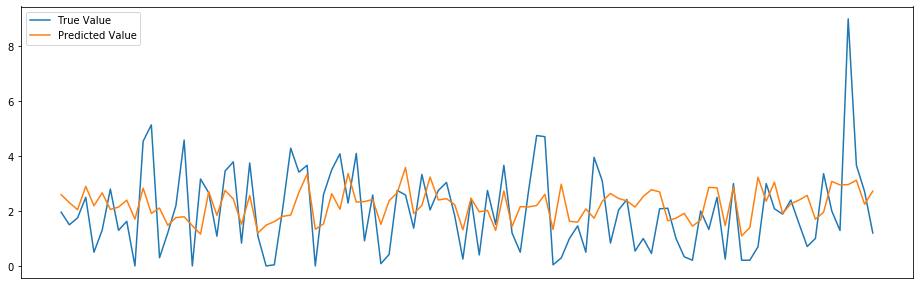






------------------------------------------
Nadam
------------------------------------------

The mean absolute error for epoch 0 is    1.34 and mean squared error is    2.92.
The mean absolute error for epoch 1 is    1.20 and mean squared error is    2.29.
The mean absolute error for epoch 2 is    1.19 and mean squared error is    2.24.
The mean absolute error for epoch 3 is    1.21 and mean squared error is    2.27.
The mean absolute error for epoch 4 is    1.20 and mean squared error is    2.24.
The mean absolute error for epoch 5 is    1.17 and mean squared error is    2.12.
The mean absolute error for epoch 6 is    1.17 and mean squared error is    2.20.
The mean absolute error for epoch 7 is    1.19 and mean squared error is    2.21.
The mean absolute error for epoch 8 is    1.17 and mean squared error is    2.16.
The mean absolute error for epoch 9 is    1.14 and mean squared error is    2.02.
The mean absolute error for epoch 10 is    1.19 and mean squared error is    2.22.

W0825 21:33:45.045344   844 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 22 is    1.09 and mean squared error is    1.90.
The mean absolute error for epoch 23 is    1.09 and mean squared error is    1.89.
The mean absolute error for epoch 24 is    1.09 and mean squared error is    1.95.
-----------------------------------------------------------
MSE: 1.9621828318150494 MAE: 1.0691866715974954 R2: 0.17738884650564735
-----------------------------------------------------------


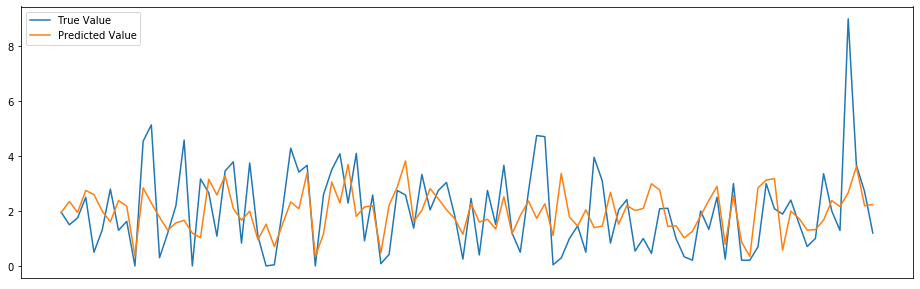

In [20]:
for i in OPTIMIZER:
    print("------------------------------------------\n" + str(i).split("(")[0].split(".")[-1].split(" ")[0]+ "\n------------------------------------------\n")
    model = getmodel(i)
    _ = model.fit(X_train.values, Y_train.values,
          batch_size=64,
          steps_per_epoch=25,
          epochs=25,
          verbose=0,
          callbacks=[myCallbacks()])
    plotter.find_accurracy_on_testset(model, X_test, Y_test,clip=True, plot=True)
    print("\n\n\n\n")